https://www.youtube.com/watch?v=CbTU92pbDKw
https://colab.research.google.com/drive/1Bk4zPQwAfzoSHZokKUefKL1s6lqmam6S?usp=sharing#scrollTo=-0LJeyey_o6t

In [21]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('ticket data.csv',index_col=0)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637 entries, 0 to 636
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    637 non-null    object
 1   Count   637 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 14.9+ KB


In [24]:
import datetime

def str_to_datetime(s):
    split_temp = s.split(' ')
    date = split_temp[0].split('/')
    time = []
    time.append(split_temp[1][0:2])
    time.append(split_temp[1][3:5])
    time.append(split_temp[1][6:8])
    year, month, day = int('20' + date[0]), int(date[1]), int(date[2])
    hour, minutes, seconds = int(time[0]), int(time[1]), int(time[2])
    return datetime.datetime(year=year, month=month, day=day, hour=hour,minute=minutes,second=seconds)

datetime_object = str_to_datetime('22/07/01 10:34:56')
datetime_object

datetime.datetime(2022, 7, 1, 10, 34, 56)

In [25]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

0     2022-07-01 00:00:00
1     2022-07-01 01:00:00
2     2022-07-01 02:00:00
3     2022-07-01 03:00:00
4     2022-07-01 04:00:00
              ...        
632   2022-07-27 22:00:00
633   2022-07-30 00:00:00
634   2022-07-30 03:00:00
635   2022-07-30 18:00:00
636   2022-07-30 21:00:00
Name: Date, Length: 637, dtype: datetime64[ns]

In [26]:
df.index = df.pop('Date')
df.head()

,Count
Date,
2022-07-01 00:00:00,362
2022-07-01 01:00:00,486
2022-07-01 02:00:00,363
2022-07-01 03:00:00,225
2022-07-01 04:00:00,116


In [27]:
window_df=df[["Count"]]
window_df.rename(columns = {'Count':'Target'}, inplace = True)
window_df["Target-1"] = 0
window_df["Target-2"] = 0
window_df["Target-3"] = 0
window_df

,Target,Target-1,Target-2,Target-3
Date,,,,
2022-07-01 00:00:00,362,0,0,0
2022-07-01 01:00:00,486,0,0,0
2022-07-01 02:00:00,363,0,0,0
2022-07-01 03:00:00,225,0,0,0
2022-07-01 04:00:00,116,0,0,0
...,...,...,...,...
2022-07-27 22:00:00,1,0,0,0
2022-07-30 00:00:00,1,0,0,0
2022-07-30 03:00:00,1,0,0,0


In [28]:
window_df.iloc[0]['Target']

362

In [29]:
for row in range(0,len(window_df)):
    try:
        window_df.iloc[row,1] = window_df.iloc[row-1,0]
    except:
        print('Skip')
    try:
        window_df.iloc[row,2] = window_df.iloc[row-1,1]
    except:
        print('Skip')
    try:
        window_df.iloc[row,3] = window_df.iloc[row-1,2]
    except:
        print('Skip')

In [30]:
window_df.head(20)

,Target,Target-1,Target-2,Target-3
Date,,,,
2022-07-01 00:00:00,362,1,0,0
2022-07-01 01:00:00,486,362,1,0
2022-07-01 02:00:00,363,486,362,1
2022-07-01 03:00:00,225,363,486,362
2022-07-01 04:00:00,116,225,363,486
2022-07-01 05:00:00,416,116,225,363
2022-07-01 06:00:00,1050,416,116,225
2022-07-01 07:00:00,2119,1050,416,116
2022-07-01 08:00:00,4318,2119,1050,416


In [31]:
window_df=window_df[2:]
window_df.reset_index(level=0, inplace=True)

In [32]:
window_df

,Date,Target,Target-1,Target-2,Target-3
0,2022-07-01 02:00:00,363,486,362,1
1,2022-07-01 03:00:00,225,363,486,362
2,2022-07-01 04:00:00,116,225,363,486
3,2022-07-01 05:00:00,416,116,225,363
4,2022-07-01 06:00:00,1050,416,116,225
...,...,...,...,...,...
630,2022-07-27 22:00:00,1,4,44,81
631,2022-07-30 00:00:00,1,1,4,44
632,2022-07-30 03:00:00,1,1,1,4
633,2022-07-30 18:00:00,1,1,1,1


In [33]:
def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()
    dates = df_as_np[:,0]
    middle_matrix = df_as_np[:, 1:-1]
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))
    Y = df_as_np[:, -1]
    return dates, X.astype(np.float32), Y.astype(np.float32)
dates, X, y = windowed_df_to_date_X_y(window_df)

dates.shape, X.shape, y.shape

((635,), (635, 3, 1), (635,))

In [34]:
print(type( X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


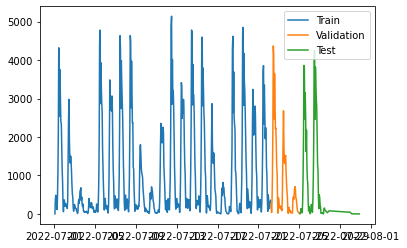

In [35]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

In [37]:
model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
16/16 [==============================] - 11s 79ms/step - loss: 2587571.2500 - mean_absolute_error: 1026.2173 - val_loss: 1813975.7500 - val_mean_absolute_error: 861.2132
Epoch 2/100
16/16 [==============================] - 0s 16ms/step - loss: 2585568.7500 - mean_absolute_error: 1025.2554 - val_loss: 1812383.5000 - val_mean_absolute_error: 860.2153
Epoch 3/100
16/16 [==============================] - 0s 17ms/step - loss: 2582602.2500 - mean_absolute_error: 1023.7482 - val_loss: 1808379.3750 - val_mean_absolute_error: 857.7428
Epoch 4/100
16/16 [==============================] - 0s 11ms/step - loss: 2575813.2500 - mean_absolute_error: 1020.2357 - val_loss: 1800274.2500 - val_mean_absolute_error: 852.3647
Epoch 5/100
16/16 [==============================] - 0s 14ms/step - loss: 2560861.0000 - mean_absolute_error: 1012.4385 - val_loss: 1780151.6250 - val_mean_absolute_error: 840.0984
Epoch 6/100
16/16 [==============================] - 0s 13ms/step - loss: 2526264.5000 - mean_

Epoch 47/100
16/16 [==============================] - 0s 10ms/step - loss: 287428.7812 - mean_absolute_error: 314.6975 - val_loss: 203421.8438 - val_mean_absolute_error: 278.4181
Epoch 48/100
16/16 [==============================] - 0s 9ms/step - loss: 260666.4375 - mean_absolute_error: 295.9864 - val_loss: 206719.7969 - val_mean_absolute_error: 269.2954
Epoch 49/100
16/16 [==============================] - 0s 10ms/step - loss: 291559.3750 - mean_absolute_error: 310.2941 - val_loss: 228385.2344 - val_mean_absolute_error: 280.7499
Epoch 50/100
16/16 [==============================] - 0s 9ms/step - loss: 327583.1875 - mean_absolute_error: 324.3136 - val_loss: 196752.7031 - val_mean_absolute_error: 257.6659
Epoch 51/100
16/16 [==============================] - 0s 9ms/step - loss: 286322.7812 - mean_absolute_error: 308.5982 - val_loss: 185172.5625 - val_mean_absolute_error: 257.9886
Epoch 52/100
16/16 [==============================] - 0s 12ms/step - loss: 271276.3438 - mean_absolute_error

Epoch 93/100
16/16 [==============================] - 0s 10ms/step - loss: 250516.6250 - mean_absolute_error: 298.5286 - val_loss: 180039.1094 - val_mean_absolute_error: 260.8948
Epoch 94/100
16/16 [==============================] - 0s 10ms/step - loss: 247061.9844 - mean_absolute_error: 289.2913 - val_loss: 173671.1406 - val_mean_absolute_error: 258.9237
Epoch 95/100
16/16 [==============================] - 0s 9ms/step - loss: 248671.7656 - mean_absolute_error: 293.3964 - val_loss: 192240.4375 - val_mean_absolute_error: 252.4606
Epoch 96/100
16/16 [==============================] - 0s 8ms/step - loss: 294036.7812 - mean_absolute_error: 318.1977 - val_loss: 227713.4531 - val_mean_absolute_error: 273.7397
Epoch 97/100
16/16 [==============================] - 0s 8ms/step - loss: 281971.7500 - mean_absolute_error: 304.3737 - val_loss: 187582.1406 - val_mean_absolute_error: 256.4831
Epoch 98/100
16/16 [==============================] - 0s 8ms/step - loss: 260495.8281 - mean_absolute_error:

16/16 [==============================] - 1s 4ms/step


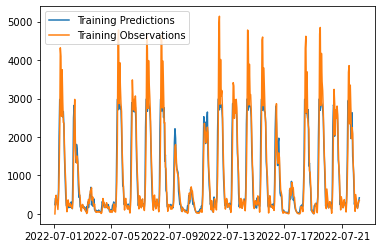

In [38]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

2/2 [==============================] - 0s 6ms/step


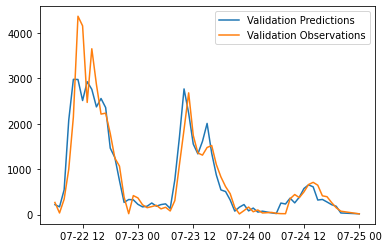

In [39]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

2/2 [==============================] - 0s 4ms/step


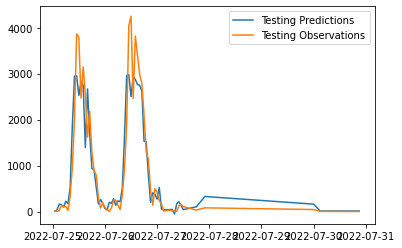

In [40]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

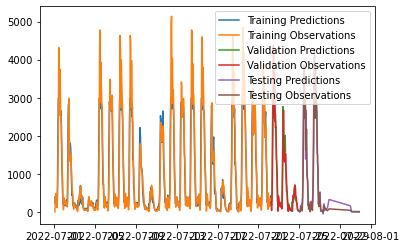

In [41]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 47ms/step
